# AO3 Summary Statistics

This notebook demonstrates how to download and process the user interaction and work metadata tables from the AO3 dataset.

`ao3_interaction_table.csv` contains user-work interactions collected from [Archive of Our Own](https://archiveofourown.org/) (AO3). Usernames are pseudonymized from the original AO3 user accounts. The works represent a subset of those presented in the Webis Trigger Warning Corpus 2023 (https://zenodo.org/records/7976807). We collected updated kudos, hits, and user interactions for a third of the works in the corpus. Approximately 11% of the attempted work downloads failed due to being privatized or deleted. The works were collected sequentially at index 0, 100,000, 200,000, 300,000, 500,000 and 700,000 of the Corpus and were confirmed as a representative subset of the entire Corpus. `ao3_sensitivity_table.csv` contains the updated kudos, hits, and user interactions along with the trigger warning categorizations from the Corpus.

Only works with at least 3 interactions and users with at least 3 interactions are included.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

try:
    plt.style.use("seaborn-v0_8-darkgrid")
except:
    plt.style.use("seaborn-darkgrid")
plt.rcParams.update({'font.size': 16})

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
interaction_table = pd.read_csv("data/ao3_interaction_table.csv").drop(columns="Unnamed: 0")
sensitivity_table = pd.read_csv("data/ao3_sensitivity_table.csv").drop(columns="Unnamed: 0")

## Interaction Summary

In [57]:
interactions = interaction_table.groupby('user_id')
print("max interactions per user: " + str(max(interactions.size())))
print("min interactions per user: " + str(min(interactions.size())))
print("mean interactions per user: " + str(np.mean(interactions.size())))
print("median interactions per user: " + str(np.median(interactions.size())))
print("std dev interactions per user: " + str(np.std(interactions.size())))
print("\n")

print("max interactions per work: " + str(sensitivity_table["n_users"].max()))
print("min interactions per work: " + str(sensitivity_table["n_users"].min()))
print("mean interactions per work: " + str(sensitivity_table["n_users"].mean()))
print("median interactions per work: " + str(sensitivity_table["n_users"].median()))
print("std dev interactions per work: " + str(sensitivity_table["n_users"].std()))
print("\n")

print("max kudos per work: " + str(sensitivity_table["n_kudos"].max()))
print("min kudos per work: " + str(sensitivity_table["n_kudos"].min()))
print("mean kudos per work: " + str(sensitivity_table["n_kudos"].mean()))
print("median kudos per work: " + str(sensitivity_table["n_kudos"].median()))
print("std dev kudos per work: " + str(sensitivity_table["n_kudos"].std()))
print("\n")

print("max hits per work: " + str(sensitivity_table["n_hits"].max()))
print("min hits per work: " + str(sensitivity_table["n_hits"].min()))
print("mean hits per work: " + str(sensitivity_table["n_hits"].mean()))
print("median hits per work: " + str(sensitivity_table["n_hits"].median()))
print("std dev hits per work: " + str(sensitivity_table["n_hits"].std()))
print("\n")

n_users = len(interaction_table["user_id"].unique())
print("Density: " + str(len(interaction_table) / (len(interaction_table['user_id'].unique()) * (len(sensitivity_table)))))

max interactions per user: 7444
min interactions per user: 3
mean interactions per user: 35.21947814273217
median interactions per user: 11.0
std dev interactions per user: 75.51131102797798


max interactions per work: 23709
min interactions per work: 3
mean interactions per work: 150.06605773722603
median interactions per work: 55.0
std dev interactions per work: 386.8466281464518


max kudos per work: 39209
min kudos per work: 5
mean kudos per work: 265.83102534701464
median kudos per work: 110.0
std dev kudos per work: 621.0374611297212


max hits per work: 1000155
min hits per work: 100
mean hits per work: 5468.399172195706
median hits per work: 2303.0
std dev hits per work: 13186.88547331788


Density: 0.00011505459830823515


/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


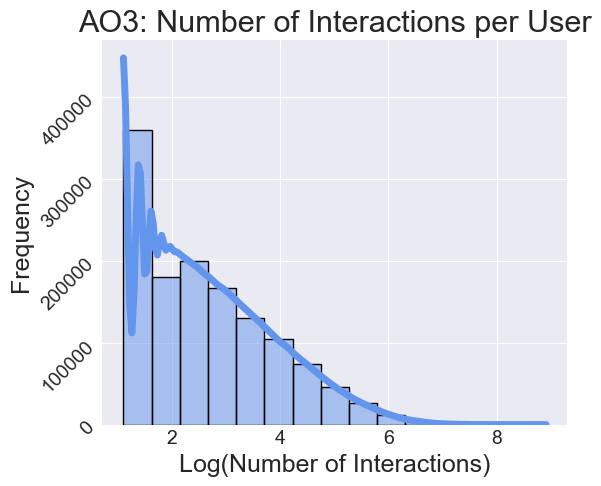

In [58]:
interaction_counts = np.log(interaction_table.groupby('user_id').size())

fig, ax = plt.subplots(figsize=(6, 5))

sns.histplot(interaction_counts, bins=15, kde=True, line_kws={'lw':5}, color='cornflowerblue', edgecolor='black', ax=ax)

plt.xlabel('Log(Number of Interactions)', fontsize=18)
plt.xticks([2, 4, 6, 8], fontsize=14)
plt.yticks(fontsize=14, rotation=45)
plt.ylabel('Frequency', fontsize=18)
plt.title('AO3: Number of Interactions per User', fontsize=22)
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


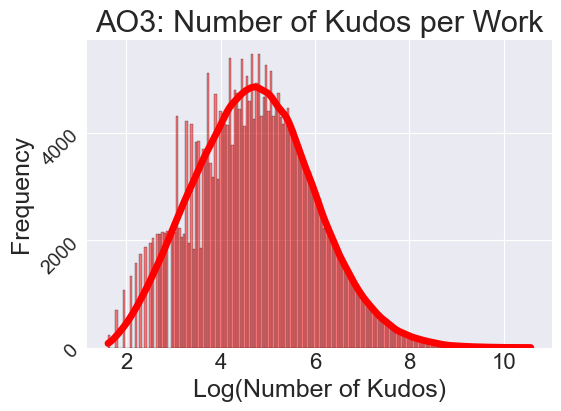

In [59]:
log_kudos = np.log(sensitivity_table["n_kudos"])

fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=log_kudos, kde=True, color='red', line_kws={'lw':5}, label='number of ratings', ax=ax)

plt.xlabel('Log(Number of Kudos)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.yticks([0, 2000, 4000], fontsize=14, rotation=45)
plt.title('AO3: Number of Kudos per Work', fontsize=22)
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


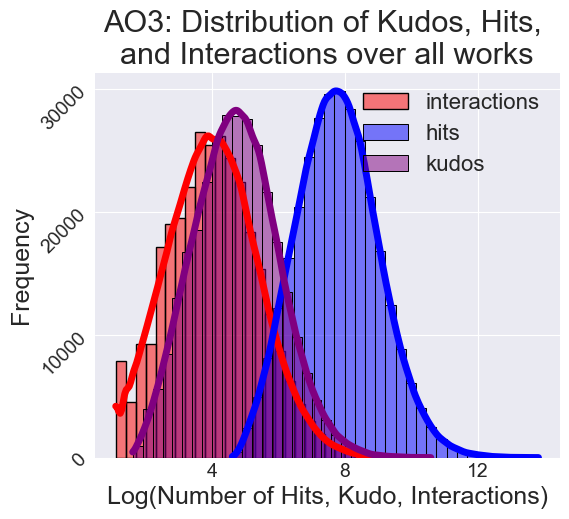

In [66]:
sensitivity_table['log_hits'] = np.log(sensitivity_table['n_hits'])
sensitivity_table['log_users'] = np.log(sensitivity_table['n_users'])
sensitivity_table['log_kudos'] = np.log(sensitivity_table['n_kudos'])

fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=sensitivity_table, x='log_users', bins=30, kde=True, color='red', line_kws={'lw':5}, label='interactions', ax=ax)
sns.histplot(data=sensitivity_table, x='log_hits', bins=30, kde=True, color='blue', line_kws={'lw':5}, label='hits', ax=ax)
sns.histplot(data=sensitivity_table, x='log_kudos', bins=30, kde=True, color='purple', line_kws={'lw':5}, label='kudos', ax=ax)

plt.xlabel('Log(Number of Hits, Kudo, Interactions)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks([4, 8, 12], fontsize=14)
plt.yticks([0, 10000, 20000, 30000], fontsize=14, rotation=45)
plt.title('AO3: Distribution of Kudos, Hits, \nand Interactions over all works', fontsize=22)
plt.legend(loc='best')
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

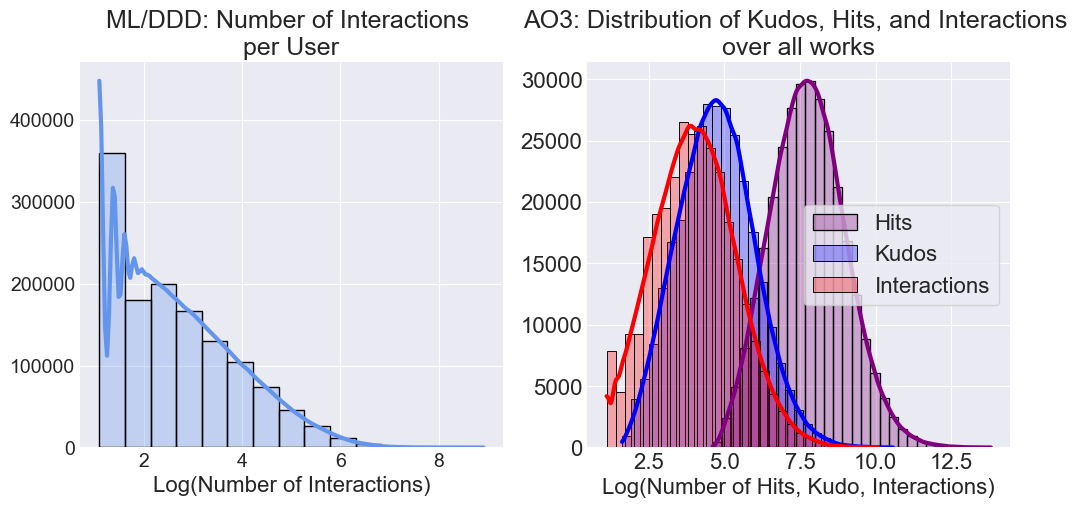

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(interaction_counts, bins=15, kde=True, color='cornflowerblue', line_kws={'lw':3}, alpha=0.3, ax=axes[0])
axes[0].set_xlabel('Log(Number of Interactions)', fontsize=16)
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_title('ML/DDD: Number of Interactions \nper User', fontsize=18)

sns.histplot(data=sensitivity_table, x='log_hits', kde=True, bins=30, color='purple', line_kws={'lw':3}, alpha=0.3,label='Hits', ax=axes[1])
sns.histplot(data=sensitivity_table, x='log_kudos', kde=True, bins=30, color='blue',line_kws={'lw':3}, alpha=0.3, label='Kudos', ax=axes[1])
sns.histplot(data=sensitivity_table, x='log_users', kde=True, bins=30, color='red', line_kws={'lw':3}, alpha=0.3,label='Interactions', ax=axes[1])

axes[1].set_xlabel('Log(Number of Hits, Kudo, Interactions)', fontsize=16)
axes[1].set_ylabel("")
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[1].set_title('AO3: Distribution of Kudos, Hits, and Interactions \nover all works', fontsize=18)

plt.legend(loc="right", frameon=True)
plt.show()

## Warning Summary

In [4]:
warnings = set(sensitivity_table.columns[-36:])
warnings

{'ableism',
 'abortion',
 'abuse',
 'abusive-language',
 'addiction',
 'animal-abuse',
 'blood-gore',
 'body-shaming',
 'child-abuse',
 'childbirth',
 'classism',
 'collective-violence',
 'death',
 'dysmorphia',
 'homophobia',
 'incest',
 'kidnapping',
 'mental-illness',
 'miscarriage',
 'other-abuse',
 'other-aggression',
 'other-discrimination',
 'other-medical',
 'other-mental-health',
 'other-pregnancy',
 'other-sexual',
 'pornography',
 'procedures',
 'racism',
 'religious-discrimination',
 'self-harm',
 'sexism',
 'sexual-abuse',
 'suicide',
 'transphobia',
 'violence'}

We will perform a permutation test to examine the following null hypothesis: the presence of a sensitivity label has no impact on work popularity. In other words, does the distribution of popularity for works marked with a sensitivity label match the distribution of popularity for works without the label?

The observed difference is the difference between the number of interactions for works with a warning and what would be expected under the null hypothesis. Hence a positive difference implies works with the warning receive more interactions than expected. A p-value of less than 0.005 indicated the difference in distributions is statistically significant.

The warning_stats dataframe also contains other relevant information about the warnings, such as their prevalence in the dataset.

In [45]:
# Function to visualize the difference in distributions of interactions for works marked with or without a warning
def warning_popularity_distribution(warning):
    fig, ax = plt.subplots(figsize=(6, 5))

    sns.histplot(data=sensitivity_table[sensitivity_table[warning] == 1]['n_users'], bins=80, kde=True, stat='density', color='red', edgecolor="none", label=f'Interactions w/ \n{warning}', log_scale=True, alpha=0.5, ax=ax)
    sns.histplot(data=sensitivity_table[sensitivity_table[warning] == 0]['n_users'], bins=80, kde=True, stat='density', color='blue', edgecolor="none", label=f'Interactions w/o \n{warning}', log_scale=True, alpha=0.5, ax=ax)

    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Work Popularity With and Without {warning} Warnings')
    plt.legend(loc="best")
    plt.show()

def mean_difference(group1, group2):
    return np.mean(group1) - np.mean(group2)

# Define a function to perform permutation test
def permutation_test(data, warning_column, target_column, num_permutations=1000):
    # Observed difference in means
    observed_difference = mean_difference(data[data[warning_column] == 1][target_column],
                                          data[data[warning_column] == 0][target_column])
    
    permutation_differences = []
    for _ in range(num_permutations):
        # Permute the target column
        permuted_data = data[target_column].sample(frac=1, replace=False).reset_index(drop=True)
        # Reconstruct the DataFrame to align with the original warning column
        permuted_df = pd.concat([data[warning_column].reset_index(drop=True), permuted_data], axis=1)
        
        # Compute the difference in means for the permuted data
        permuted_difference = mean_difference(permuted_df[permuted_df[warning_column] == 1][target_column],
                                              permuted_df[permuted_df[warning_column] == 0][target_column])
        permutation_differences.append(permuted_difference)
    
    # Calculate p-value
    p_value = (np.abs(permutation_differences) >= np.abs(observed_difference)).mean()
    
    return observed_difference, p_value

In [6]:
warning_stats = []

for warning in warnings:
    n_works_yes = len(sensitivity_table[sensitivity_table[warning] == 1])
    n_works_no = len(sensitivity_table[sensitivity_table[warning] == 0])
    
    # Av interactions
    mean_interactions_with_warning = sensitivity_table[sensitivity_table[warning] == 1]['n_users'].mean()
    mean_interactions_without_warning = sensitivity_table[sensitivity_table[warning] == 0]['n_users'].mean()

    # Permutation test
    observed_difference, p_value = permutation_test(sensitivity_table, warning, 'n_users')
    
    warning_stats.append([warning, n_works_yes, n_works_no, mean_interactions_with_warning, mean_interactions_without_warning, observed_difference, p_value])

warning_stats = pd.DataFrame(warning_stats, columns=["Warning", "Total Works With Warning", "Total Works W/O Warning", "Av Interactions per Work With Warning", "Av Interactions per Work W/O Warning", "Permutation Test Difference", "Permutation Test P-Value"])
warning_stats = warning_stats.sort_values(by=["Total Works With Warning"], ascending=False)
warning_stats

,Warning,Total Works With Warning,Total Works W/O Warning,Av Interactions per Work With Warning,Av Interactions per Work W/O Warning,Permutation Test Difference,Permutation Test P-Value
12,pornography,174391,131720,165.093130,130.170931,34.922199,0.000
8,violence,42084,264027,151.314252,149.867105,1.447148,0.488
29,other-mental-health,40560,265551,147.763585,150.417735,-2.654150,0.187
31,death,36123,269988,114.782327,154.786839,-40.004512,0.000
34,other-sexual,35784,270327,167.330679,147.780688,19.549991,0.000
11,sexual-abuse,35005,271106,166.887359,147.894104,18.993255,0.000
3,abuse,32111,274000,171.571424,147.545770,24.025654,0.000
30,other-medical,21428,284683,161.828122,149.180731,12.647391,0.000
16,blood-gore,19299,286812,128.599306,151.510512,-22.911206,0.000
17,abusive-language,18708,287403,149.801636,150.083270,-0.281634,0.922


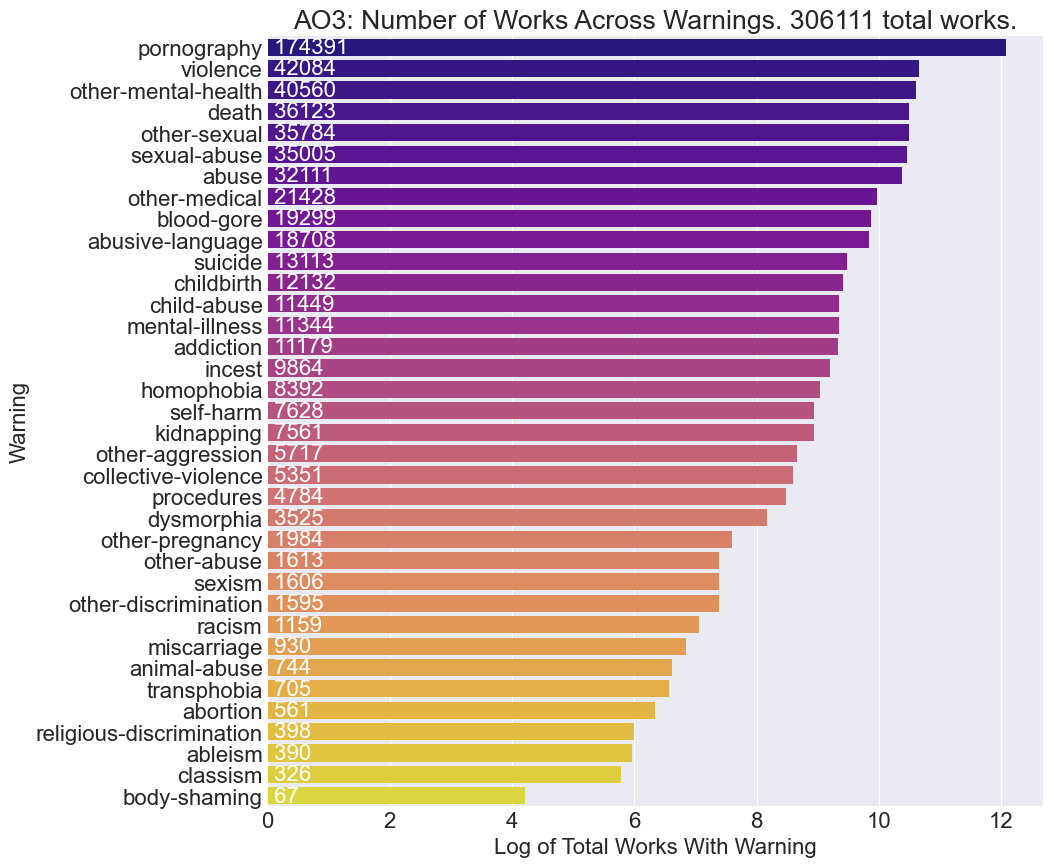

In [28]:
# Compute the log of the 'Number of Clear Yes' values
warning_stats['Log Total Works With Warning'] = np.log(warning_stats['Total Works With Warning'])

# Sort the DataFrame by the 'Log Number of Clear Yes' in descending order
df_sorted = warning_stats.sort_values(by='Log Total Works With Warning', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 10))
barplot = sns.barplot(
    x='Log Total Works With Warning', 
    y='Warning', 
    data=df_sorted, 
    palette='plasma'
)

# Annotate each bar with the original 'Number of Clear Yes' value
for index, value in enumerate(df_sorted['Total Works With Warning']):
    plt.text(0, index, f' {value}', color='white', va='center')

# Display the plot
plt.title(f'AO3: Number of Works Across Warnings. {len(sensitivity_table)} total works.')
plt.xlabel('Log of Total Works With Warning')
plt.ylabel('Warning')
plt.show()

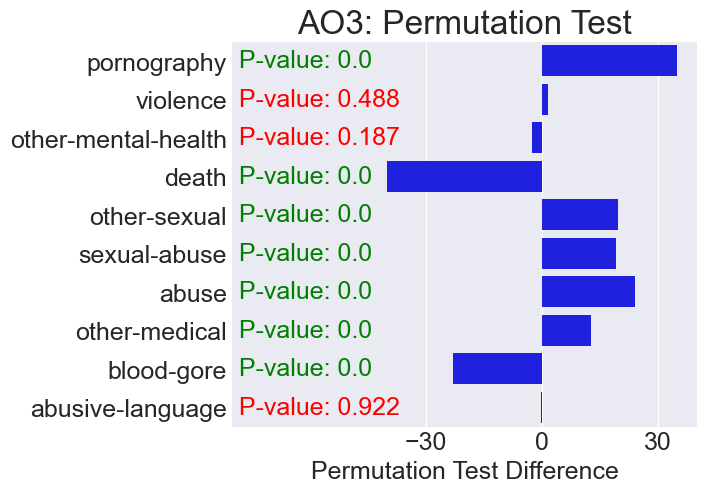

In [74]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(y=warning_stats["Warning"].head(10), x=warning_stats["Permutation Test Difference"].head(10), color="blue", ax=ax)
ax.set_title("AO3: Permutation Test", fontsize=24)
ax.set_xlim(-80,40)
ax.set_xticks([-30, 0, 30])
ax.set_xlabel(xlabel="Permutation Test Difference", fontsize=18)
ax.set_ylabel(ylabel="")
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

for index, value in enumerate(df_sorted['Permutation Test P-Value'].head(10)):
    color = 'green' if value < 0.005 else 'red'
    ax.text(-80, index, f' P-value: {value}', color=color, va='center', fontsize=18)

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


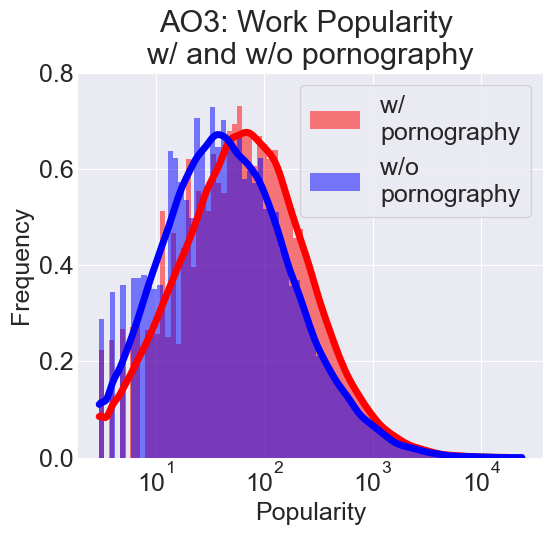

In [77]:
fig, ax = plt.subplots(figsize=(6, 5))

warning = 'pornography'
sns.histplot(data=sensitivity_table[sensitivity_table[warning] == 1]['n_users'], bins=80, kde=True, line_kws={'lw':5}, stat='density', color='red', edgecolor="none", label=f'w/ \n{warning}', log_scale=True, alpha=0.5, ax=ax)
sns.histplot(data=sensitivity_table[sensitivity_table[warning] == 0]['n_users'], bins=80, kde=True,  line_kws={'lw':5}, stat='density', color='blue', edgecolor="none", label=f'w/o \n{warning}', log_scale=True, alpha=0.5, ax=ax)

ax.set_xlabel('Popularity', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8])
ax.set_title(f'AO3: Work Popularity \nw/ and w/o {warning}', fontsize=22)
ax.legend(frameon=True, fontsize=18, loc="upper right")
plt.show()

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


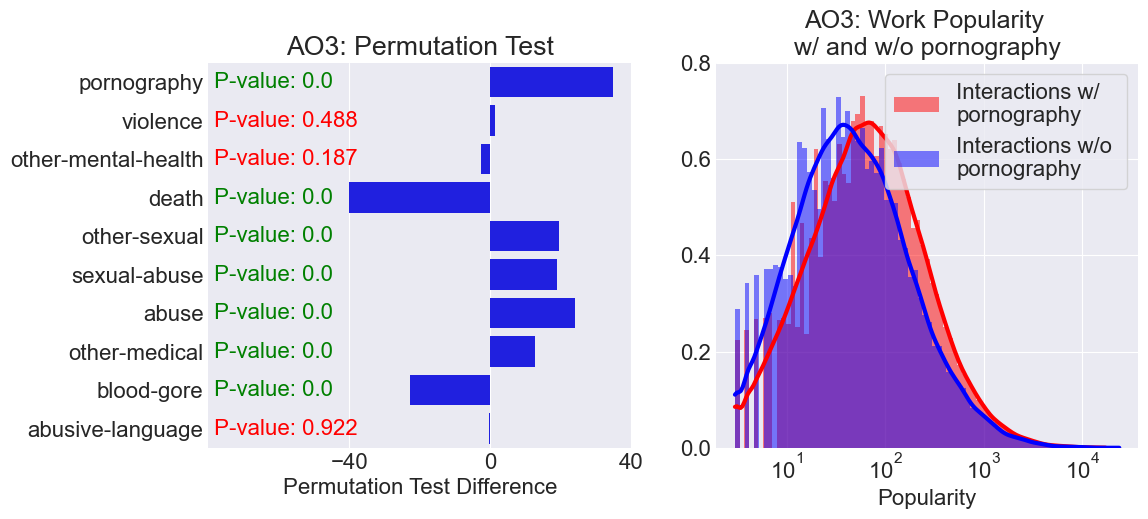

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(y=warning_stats["Warning"].head(10), x=warning_stats["Permutation Test Difference"].head(10), color="blue", ax=axes[0])
axes[0].set_title("AO3: Permutation Test")
axes[0].set_xlim(-80,40)
axes[0].set_xticks([-40, 0, 40])
axes[0].set_xlabel(xlabel="Permutation Test Difference", fontsize=16)
axes[0].set_ylabel(ylabel="")
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)

for index, value in enumerate(df_sorted['Permutation Test P-Value'].head(10)):
    color = 'green' if value < 0.005 else 'red'
    axes[0].text(-80, index, f' P-value: {value}', color=color, va='center')

warning = 'pornography'
sns.histplot(data=sensitivity_table[sensitivity_table[warning] == 1]['n_users'], bins=80, kde=True, line_kws={'lw':3}, stat='density', color='red', edgecolor="none", label=f'Interactions w/ \n{warning}', log_scale=True, alpha=0.5, ax=axes[1])
sns.histplot(data=sensitivity_table[sensitivity_table[warning] == 0]['n_users'], bins=80, kde=True,  line_kws={'lw':3}, stat='density', color='blue', edgecolor="none", label=f'Interactions w/o \n{warning}', log_scale=True, alpha=0.5, ax=axes[1])

axes[1].set_xlabel('Popularity', fontsize=16)
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
axes[1].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8])
axes[1].set_title(f'AO3: Work Popularity \nw/ and w/o {warning}', fontsize=18)
axes[1].legend(frameon=True, fontsize=16, loc="upper right")
plt.show()

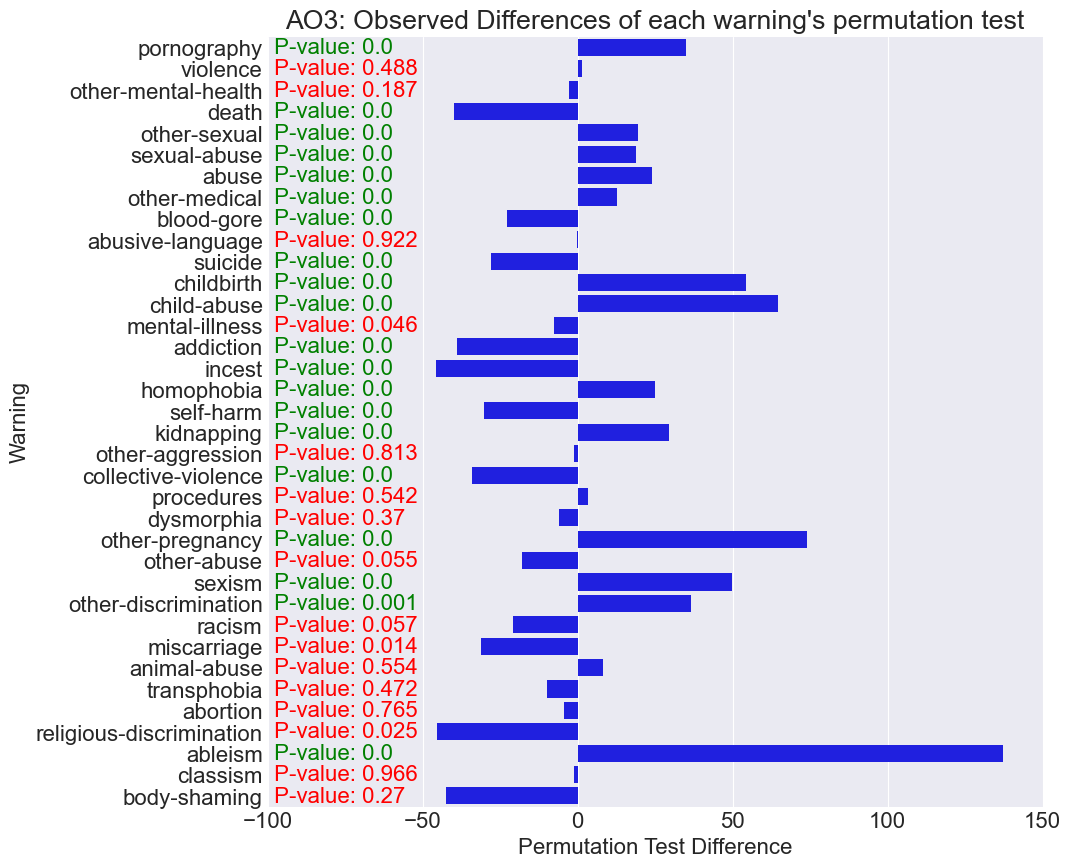

In [43]:
# The plot below shows the observed difference between the from the permutation test. A positive result indicates the average ratings
# for works marked Clear Yes for the warning are greater (more popular) than what would be expected under a null hypothesis.
# The p-value of the test is also displayed, indicating whether the difference is statistically significant (p-value < 0.005).
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=warning_stats["Warning"], x=warning_stats["Permutation Test Difference"], color="blue", ax=ax)
plt.title("AO3: Observed Differences of each warning's permutation test")
plt.xlim(-100, 150)

for index, value in enumerate(df_sorted['Permutation Test P-Value']):
    color = 'green' if value < 0.005 else 'red'
    plt.text(-100, index, f' P-value: {value}', color=color, va='center')

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


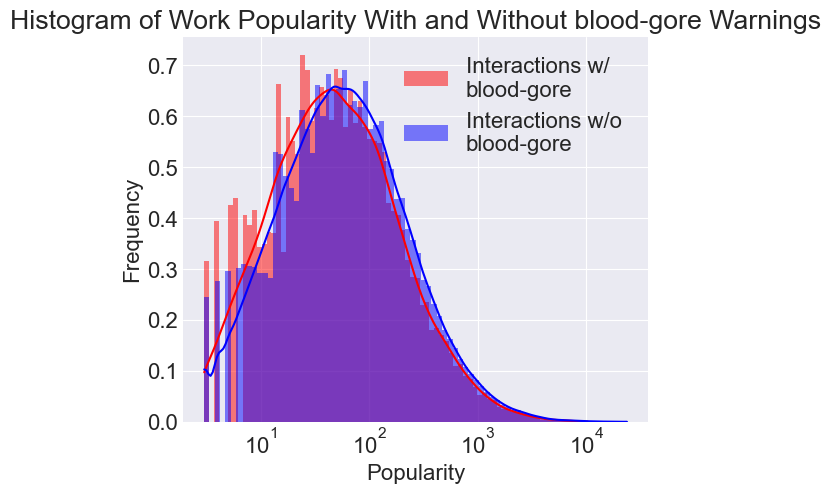

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


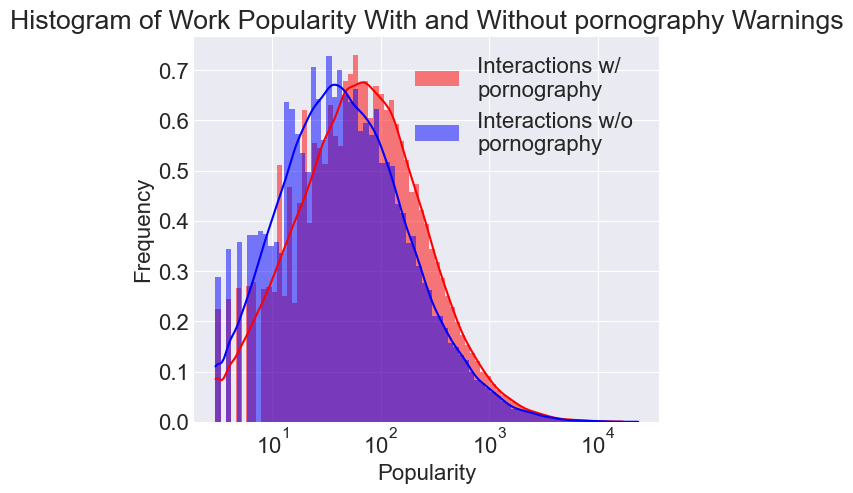

/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ameliakovacs/anaconda3/envs/surprise/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


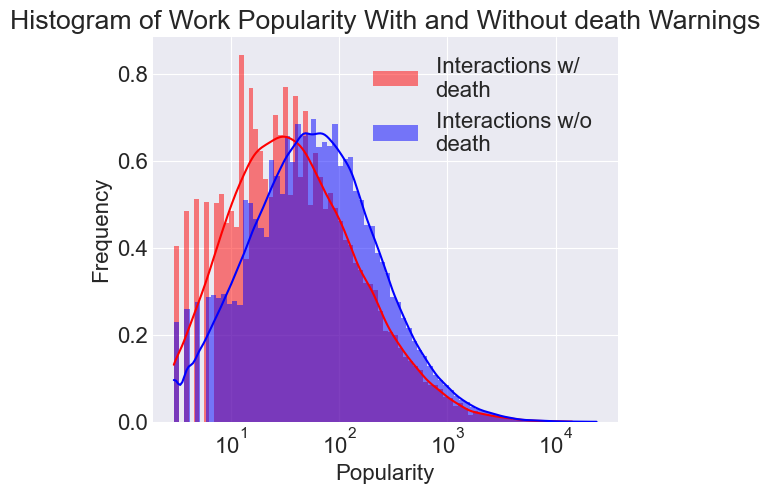

In [46]:
# We can plot histograms to visualize the distributions for warnings of interest
warning_popularity_distribution("blood-gore")
warning_popularity_distribution("pornography")
warning_popularity_distribution("death")

### User-Centric Warning Analysis

In [47]:
np.random.seed(42)
random_users = np.random.choice(interaction_table['user_id'].unique(), 1000, replace=False)

In [48]:
# Step 2: Filter interaction_table to keep only data for the randomly selected users
interaction_table_sampled = interaction_table[interaction_table['user_id'].isin(random_users)]

# Step 3: Count the number of interactions for each user
user_interaction_count = interaction_table_sampled.groupby('user_id').size().reset_index(name='interaction_count')

# Step 4: Define a function to calculate the average interaction count for works with and without each warning for a given user
def calculate_interaction_table(user_id):
    user_data = pd.merge(interaction_table_sampled[interaction_table_sampled['user_id'] == user_id], sensitivity_table, on='work_id')
    total_interactions = user_interaction_count[user_interaction_count['user_id'] == user_id]['interaction_count'].sum()
    
    user_result = {'user_id': user_id, 'Total Interactions': total_interactions}
    
    for warning in warnings:
        user_result[f"Interactions with {warning}"] = user_data[user_data[warning] == 1].shape[0]
        user_result[f"Interactions without {warning}"] = user_data[user_data[warning] == 0].shape[0]
        
    return user_result

# Step 5: Apply the function to each user and store the results in a list of dictionaries
results_data = user_interaction_count['user_id'].apply(calculate_interaction_table)

# Step 6: Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results_data.tolist())

# Display the results DataFrame
results_df

,user_id,Total Interactions,Interactions with kidnapping,Interactions without kidnapping,Interactions with animal-abuse,Interactions without animal-abuse,Interactions with transphobia,Interactions without transphobia,Interactions with abuse,Interactions without abuse,...,Interactions with death,Interactions without death,Interactions with collective-violence,Interactions without collective-violence,Interactions with suicide,Interactions without suicide,Interactions with other-sexual,Interactions without other-sexual,Interactions with classism,Interactions without classism
0,758,5,0,5,0,5,0,5,2,3,...,0,5,0,5,0,5,0,5,0,5
1,940,29,0,29,0,29,0,29,3,26,...,0,29,1,28,0,29,4,25,0,29
2,1969,17,1,16,0,17,0,17,2,15,...,0,17,0,17,1,16,4,13,0,17
3,2806,3,0,3,0,3,0,3,0,3,...,0,3,0,3,0,3,1,2,0,3
4,2978,5,0,5,0,5,0,5,0,5,...,0,5,0,5,0,5,0,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1299607,3,0,3,0,3,0,3,1,2,...,0,3,0,3,1,2,1,2,0,3
996,1299669,3,0,3,0,3,0,3,0,3,...,2,1,0,3,1,2,1,2,0,3
997,1299798,22,1,21,0,22,0,22,4,18,...,3,19,0,22,1,21,2,20,0,22
998,1301025,71,2,69,0,71,0,71,7,64,...,10,61,1,70,2,69,12,59,0,71


In [78]:
def plot_interaction_scatter(warning):
    
    percent_greater = len(results_df[results_df[f"Interactions with {warning}"] >= results_df[f"Interactions without {warning}"]])/len(results_df)
    print(f"Percent of works below red line: {percent_greater:2f}")

    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], color='red', transform=ax.transAxes)
    sns.scatterplot(x=results_df[f"Interactions with {warning}"], y=results_df[f"Interactions without {warning}"], color="royalblue", s=25)
    plt.title(f"AO3: Interactions per user \nw/ vs w/o {warning} ", fontsize=22)
    plt.xticks([0, 100, 200, 300, 400], fontsize=16)
    plt.yticks([0, 100, 200, 300, 400], fontsize=16)
    plt.ylabel(f"Interactions w/o {warning}", fontsize=18)
    plt.xlabel(f"Interactions w/ {warning}", fontsize=18)
    plt.show()

Percent of works below red line: 0.726000


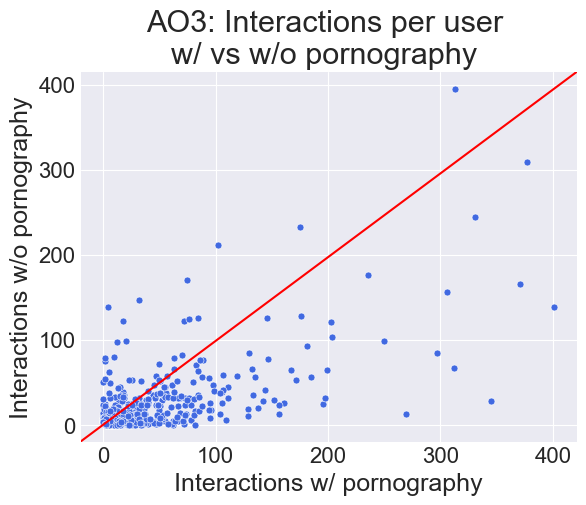

Percent of works below red line: 0.012000


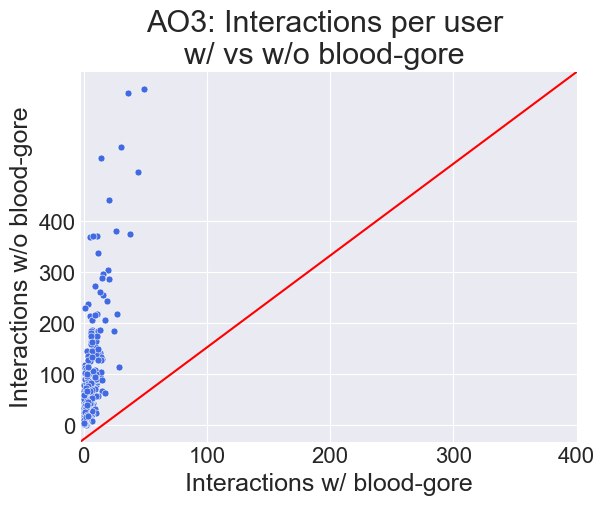

Percent of works below red line: 0.017000


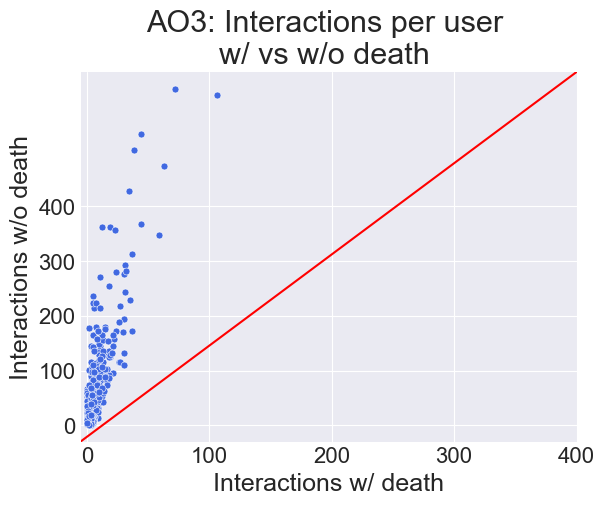

In [79]:
plot_interaction_scatter("pornography")
plot_interaction_scatter("blood-gore")
plot_interaction_scatter("death")